## Storing the csv files into a list

In [7]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import glob

os.chdir(r"dataset for kids")

fileExtension = 'B1.csv'
allCSVFiles = [i for i in glob.glob(f"*{fileExtension}")]
sorted_allCSVFiles = sorted(allCSVFiles, key=len)

## Creating a folder and csv file

In [8]:
from os import path

os.chdir(r"..") # D:\Users\Ervie John\Documents\4th year 1st sem\Digital Signal Processing and Application\Module 1\LAB1-Group3
if (str(path.exists('Csv_Files(new)')) != "True"):
    os.mkdir("Csv_Files(new)")


## Importing the mean, standard deviation, and standard error

In [9]:
import csv 

os.chdir(r"Csv_Files(new)") # D:\Users\Ervie John\Documents\4th year 1st sem\Digital Signal Processing and Application\Module 1\LAB1-Group3\Csv_Files(new)

if (str(path.exists('AllCsvFiles.csv')) != "True"):
    header = ['Mean', 'Standard Deviation']

    with open('AllCsvFiles.csv', 'w', encoding='UTF8', newline='') as f:
        writer = csv.writer(f)

        # write the header
        writer.writerow(header)

    for CSVFiles in sorted_allCSVFiles:
        os.chdir(r"..") # D:\Users\Ervie John\Documents\4th year 1st sem\Digital Signal Processing and Application\Module 1\LAB1-Group3
        os.chdir(r"dataset for kids")
        df = pd.read_csv(CSVFiles, skiprows=5)
        data = [(df.mean()['AE [V]']), (df.std()['AE [V]'])]

        os.chdir(r"..") # D:\Users\Ervie John\Documents\4th year 1st sem\Digital Signal Processing and Application\Module 1\LAB1-Group3
        os.chdir(r"Csv_Files(new)")
        with open('AllCsvFiles.csv', 'a', encoding='UTF8', newline='') as f:
            writer = csv.writer(f)

            # write the data
            writer.writerow(data)

## Saving the histogram and time series

KeyboardInterrupt: 

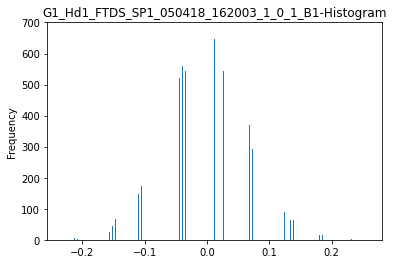

In [13]:
for CSVFiles in sorted_allCSVFiles:
    os.chdir(r"..") # D:\Users\Ervie John\Documents\4th year 1st sem\Digital Signal Processing and Application\Module 1\LAB1-Group3
    os.chdir(r"dataset for kids")
    df = pd.read_csv(CSVFiles, skiprows=5)
    Hist_title = CSVFiles[:-4] + "-Histogram"
    df['AE [V]'].plot(kind='hist', title=Hist_title, bins = 2500, xlabel='AE [V]', ylabel='Count')

    os.chdir(r"..") # D:\Users\Ervie John\Documents\4th year 1st sem\Digital Signal Processing and Application\Module 1\LAB1-Group3
    os.chdir(r"Csv_Files(new)")
    plt.savefig(Hist_title+'.png', facecolor='white', transparent=False)
    plt.clf()

KeyboardInterrupt: 

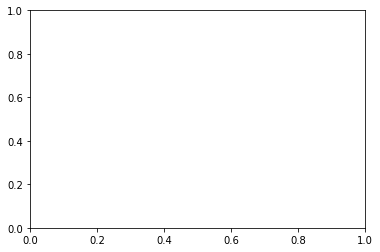

In [12]:
for CSVFiles in sorted_allCSVFiles:
    os.chdir(r"..")
    os.chdir(r"dataset for kids")
    df = pd.read_csv(CSVFiles, skiprows=5)
    TS_title = CSVFiles[:-4] + "-Time-Series"
    df['AE [V]'].plot(title=TS_title, xlabel='Steps', ylabel='Count')

    os.chdir(r"..") # D:\Users\Ervie John\Documents\4th year 1st sem\Digital Signal Processing and Application\Module 1\LAB1-Group3
    os.chdir(r"Csv_Files(new)")
    plt.savefig(TS_title+'.png', facecolor='white', transparent=False)
    plt.clf()

### Plot all the mean

In [10]:
os.chdir(r"..") # D:\Users\Ervie John\Documents\4th year 1st sem\Digital Signal Processing and Application\Module 1\LAB1-Group3
os.chdir(r"Csv_Files(new)")
df = pd.read_csv('AllCsvFiles.csv')

meanTitle = "Mean of all steps"

df['Mean'].plot(title=meanTitle, xlabel='Steps', ylabel='Mean')
plt.savefig('AllCsvFiles-Mean'+'.png', facecolor='white', transparent=False)
plt.clf()

<Figure size 432x288 with 0 Axes>